Riddhi Dinesh Vora


## Fake News Classifier Using LSTM, RNN, Bidirectional RNN

Dataset: https://www.kaggle.com/c/fake-news/data#

##Abstract

The "Fake News lassifier" project is a data-driven approach aimed at addressing this challenge. This project leverages the power of natural language processing and deep learning techniques to create a model capable of distinguishing between real and fake news articles.

With a focus on the coherence, originality, and fluency of the generated texts, this project explores the implementation and evaluation of multiple deep learning models, including Simple Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTM) networks, and Bidirectional LSTMs. These models are trained on a labeled dataset of news articles to predict the authenticity of the content.

In addition to model development, the project includes comprehensive data preprocessing steps, which involve text cleaning, stemming, and one-hot encoding. Visualization of the training and validation performance metrics offers insights into the models' training processes.

As fake news detection technology holds the potential to influence information dissemination and public perception, the ethical aspects of such technology are also considered. This includes addressing concerns related to data bias, transparency, accountability, and privacy.

The "FakeNewsClassifier" project strives to strike a balance between technological innovation and ethical responsibility. By providing a practical example of fake news detection, it contributes to the broader discourse on the responsible use of artificial intelligence in addressing contemporary challenges related to misinformation.






##Workflow

**1.Data Collection:**
The project begins by collecting a dataset of news articles, including both real and fake news sources. In this case, the dataset includes labeled articles to serve as training and testing data.

**2.Data Preprocessing:**
* Text cleaning: The text data is preprocessed to remove any non-alphabetical characters and symbols, leaving only the essential text content.
Text normalization: The text is converted to lowercase to ensure consistency.
* Stopword removal: Common stopwords (e.g., "and," "the," "in") are removed from the text as they do not carry significant meaning for classification.
* Stemming: Words are stemmed to their root form to reduce dimensionality and improve model efficiency.
* One-Hot Encoding: The processed text is converted into numerical format using one-hot encoding, enabling it to be fed into machine learning models.

**3.Model Building:**
Multiple deep learning models are implemented, including Simple Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTM) networks, and Bidirectional LSTMs.
Each model is designed to classify news articles as either real or fake based on their textual content.
Hyperparameters, such as embedding dimensions and dropout rates, are configured for each model to optimize performance.

**4.Model Training:**
The models are trained on the preprocessed and one-hot encoded text data. This involves iteratively adjusting the model's internal parameters to minimize the classification error.
Training metrics, such as loss and accuracy, are monitored to assess the model's performance.

**5.Model Evaluation:**
The trained models are evaluated using a separate test dataset to measure their accuracy and ability to classify real and fake news accurately.
Additional metrics, such as precision, recall, and F1-score, are computed to assess the model's performance comprehensively.

**7.Ethical Considerations:**
Ethical concerns related to the project are carefully addressed. These concerns may include data bias, transparency, accountability, and privacy.
Efforts are made to ensure that the project adheres to responsible AI practices.

**8.Visualization:**
The project includes the visualization of training and validation performance metrics for each model, providing insights into their training processes.

**9.Conclusion and Recommendations:**
The project concludes by summarizing the results and performance of the various models.
Recommendations for further improvements or research directions are provided.


This workflow outlines the key steps involved in the "FakeNewsClassifier" project, from data collection to model deployment, with a strong focus on ethical considerations and responsible AI practices.






## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM, SimpleRNN, Bidirectional
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/My Drive/train.csv')
test = pd.read_csv('/content/drive/My Drive/test.csv')




Mounted at /content/drive


In [ ]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df = train.dropna()

In [ ]:
X = df.drop("label", axis = 1)
X.shape

(18285, 4)

In [ ]:
y = df["label"]
y.shape

(18285,)

In [ ]:
messages=X.copy()
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [ ]:
messages.reset_index(inplace=True)

##Data PreProcessing


In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
voc = 10000
onehot_repr=[one_hot(words,voc)for words in corpus]

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2470 7255 9734]
 [   0    0    0 ...  123 2720 7183]
 [   0    0    0 ... 7599  826 2525]
 ...
 [   0    0    0 ... 9869 5873 3173]
 [   0    0    0 ... 8392 2718 6200]
 [   0    0    0 ... 3400  645  966]]


In [ ]:
len(embedded_docs),y.shape

(18285, (18285,))

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

X_final.shape,y_final.shape

((18285, 20), (18285,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
y_train

array([1, 1, 0, ..., 0, 0, 1])

## RNN Model

In [ ]:
# RNN Model

embedding_vector_features=40

rnn = Sequential()
rnn.add(Embedding(voc,embedding_vector_features,input_length=sent_length))
rnn.add(SimpleRNN(100,return_sequences=False))

rnn.add(Dense(1, activation='sigmoid'))

rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               14100     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 414201 (1.58 MB)
Trainable params: 414201 (1.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = rnn.fit(X_train, y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/20
383/383 [==============================] - 7s 15ms/step - loss: 0.2780 - accuracy: 0.8753 - val_loss: 0.1936 - val_accuracy: 0.9158
Epoch 2/20
383/383 [==============================] - 7s 19ms/step - loss: 0.0834 - accuracy: 0.9709 - val_loss: 0.2299 - val_accuracy: 0.9100
Epoch 3/20
383/383 [==============================] - 5s 14ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.3193 - val_accuracy: 0.9165
Epoch 4/20
383/383 [==============================] - 8s 20ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.3659 - val_accuracy: 0.9158
Epoch 5/20
383/383 [==============================] - 6s 15ms/step - loss: 7.0957e-04 - accuracy: 0.9999 - val_loss: 0.3871 - val_accuracy: 0.9122
Epoch 6/20
383/383 [==============================] - 7s 18ms/step - loss: 1.8780e-04 - accuracy: 1.0000 - val_loss: 0.4237 - val_accuracy: 0.9153
Epoch 7/20
383/383 [==============================] - 6s 15ms/step - loss: 9.1295e-05 - accuracy: 1.0000 - val_loss: 0.4375 - val_accu

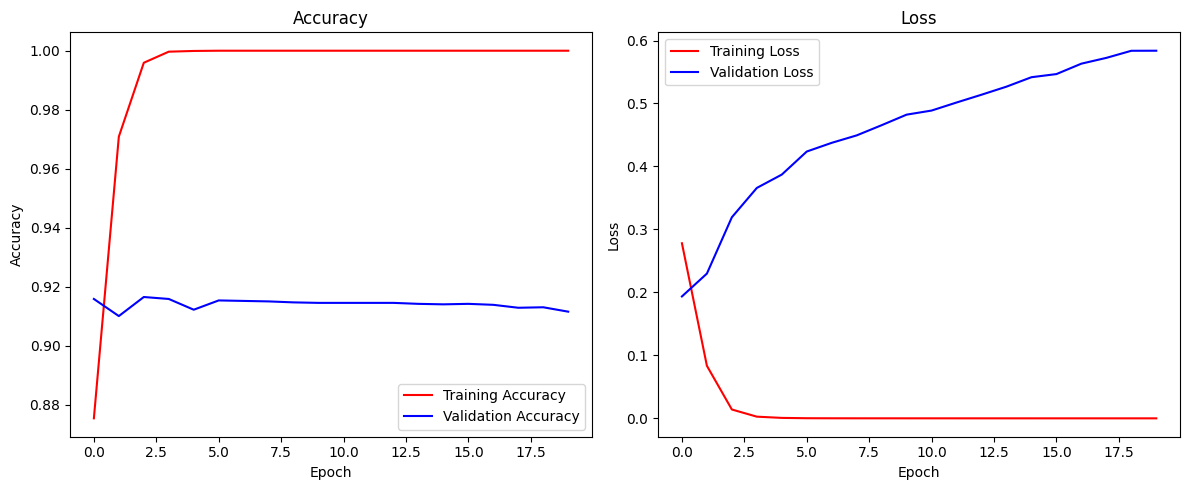

In [ ]:
plt.figure(figsize=(12, 5))

#  Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy", c="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", c="blue")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

#  Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss", c="red")
plt.plot(history.history["val_loss"], label="Validation Loss", c="blue")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.tight_layout()
plt.show()

##Evaluation & Performance

In [ ]:
y_rnn=rnn.predict(X_test)
y_rnn = (y_rnn>0.5).astype(int)

189/189 [==============================] - 1s 3ms/step


In [ ]:
accuracy_score(y_test,y_rnn)

0.9115161557580779

In [ ]:
confusion_matrix(y_test,y_rnn)

array([[3093,  326],
       [ 208, 2408]])

In [ ]:
print(classification_report(y_test,y_rnn))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3419
           1       0.88      0.92      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



##LSTM Model

In [ ]:
## LSTM Model

embedding_vector_features=40
lstm=Sequential()
lstm.add(Embedding(voc,embedding_vector_features,input_length=sent_length))
lstm.add(Dropout(0.3))
lstm.add(LSTM(100))
lstm.add(Dropout(0.3))
lstm.add(Dense(1,activation='sigmoid'))
lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            400000    
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 456501 (1.74 MB)
Trainable params: 456501 (1.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
### Finally Training
history = lstm.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
383/383 [==============================] - 15s 29ms/step - loss: 0.2810 - accuracy: 0.8787 - val_loss: 0.1902 - val_accuracy: 0.9195
Epoch 2/20
383/383 [==============================] - 11s 28ms/step - loss: 0.1295 - accuracy: 0.9498 - val_loss: 0.1973 - val_accuracy: 0.9171
Epoch 3/20
383/383 [==============================] - 12s 31ms/step - loss: 0.0847 - accuracy: 0.9699 - val_loss: 0.2149 - val_accuracy: 0.9180
Epoch 4/20
383/383 [==============================] - 12s 31ms/step - loss: 0.0557 - accuracy: 0.9803 - val_loss: 0.2731 - val_accuracy: 0.9176
Epoch 5/20
383/383 [==============================] - 13s 33ms/step - loss: 0.0369 - accuracy: 0.9870 - val_loss: 0.2858 - val_accuracy: 0.9167
Epoch 6/20
383/383 [==============================] - 11s 28ms/step - loss: 0.0219 - accuracy: 0.9940 - val_loss: 0.4275 - val_accuracy: 0.9211
Epoch 7/20
383/383 [==============================] - 11s 28ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.4187 - val_accuracy:

##Line Plot: Overfitting

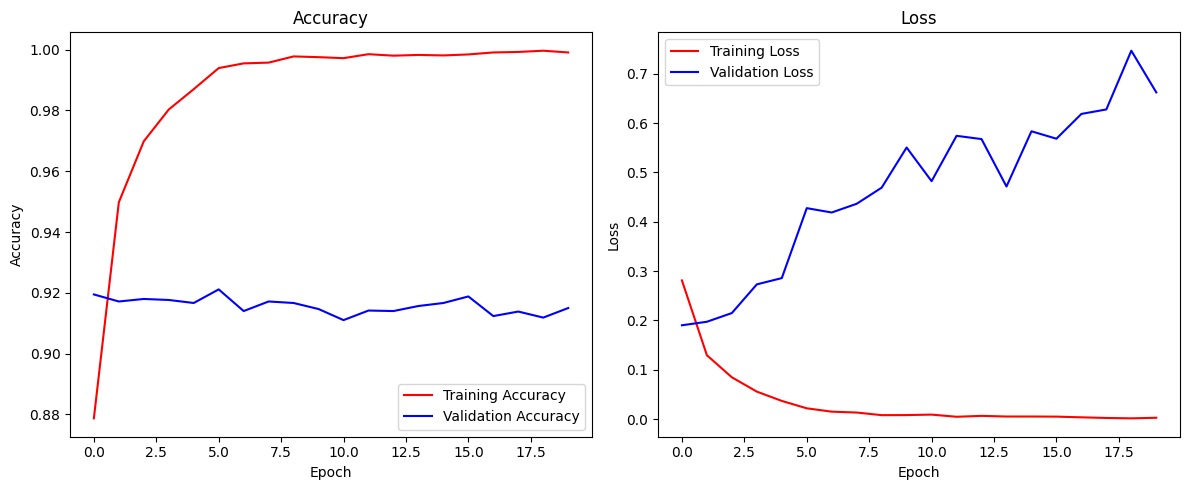

In [ ]:
plt.figure(figsize=(12, 5))

#  Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy", c="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", c="blue")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

#  Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss", c="red")
plt.plot(history.history["val_loss"], label="Validation Loss", c="blue")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.tight_layout()
plt.show()

##Evaluation & Performance

In [ ]:
y_lstm=lstm.predict(X_test)
y_lstm = (y_lstm>0.5).astype(int)

189/189 [==============================] - 4s 9ms/step


In [ ]:
accuracy_score(y_test,y_lstm)

0.9149958574979288

In [ ]:

confusion_matrix(y_test,y_lstm)

array([[3141,  278],
       [ 235, 2381]])

In [ ]:
print(classification_report(y_test,y_lstm))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3419
           1       0.90      0.91      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.92      0.91      0.92      6035



##Bidirectional Model

In [ ]:
#Bidirectional Model

embedding_vector_features=40
bid=Sequential()
bid.add(Embedding(voc,embedding_vector_features,input_length=sent_length))
bid.add(Bidirectional(LSTM(100)))
bid.add(Dropout(0.3))
bid.add(Dense(1,activation='sigmoid'))
bid.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
bid.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 40)            400000    
                                                                 
 bidirectional (Bidirection  (None, 200)               112800    
 al)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 513001 (1.96 MB)
Trainable params: 513001 (1.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = bid.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
383/383 [==============================] - 24s 47ms/step - loss: 0.2640 - accuracy: 0.8810 - val_loss: 0.2041 - val_accuracy: 0.9162
Epoch 2/20
383/383 [==============================] - 16s 42ms/step - loss: 0.1167 - accuracy: 0.9562 - val_loss: 0.2359 - val_accuracy: 0.9160
Epoch 3/20
383/383 [==============================] - 17s 45ms/step - loss: 0.0736 - accuracy: 0.9740 - val_loss: 0.2107 - val_accuracy: 0.9198
Epoch 4/20
383/383 [==============================] - 17s 43ms/step - loss: 0.0473 - accuracy: 0.9842 - val_loss: 0.3431 - val_accuracy: 0.9067
Epoch 5/20
383/383 [==============================] - 17s 45ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.3482 - val_accuracy: 0.9122
Epoch 6/20
383/383 [==============================] - 18s 47ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.4132 - val_accuracy: 0.9104
Epoch 7/20
383/383 [==============================] - 17s 45ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.4584 - val_accuracy:

##Line Plot: Overfitting

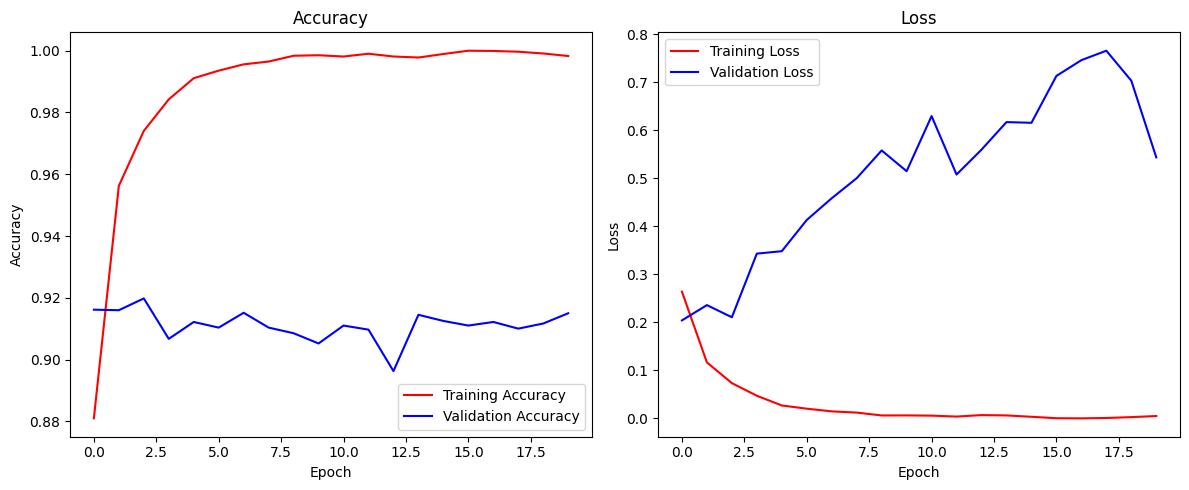

In [ ]:
plt.figure(figsize=(12, 5))

#  Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy", c="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", c="blue")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

#  Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss", c="red")
plt.plot(history.history["val_loss"], label="Validation Loss", c="blue")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.tight_layout()
plt.show()

##Evaluation & Performance

In [ ]:
y_bid=bid.predict(X_test)
y_bid = (y_bid>0.5).astype(int)

189/189 [==============================] - 4s 12ms/step


In [ ]:
accuracy_score(y_test,y_bid)

0.9149958574979288

In [ ]:
confusion_matrix(y_test,y_bid)

array([[3115,  304],
       [ 209, 2407]])

In [ ]:
print(classification_report(y_test,y_bid))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3419
           1       0.89      0.92      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.92      0.91      6035
weighted avg       0.92      0.91      0.92      6035



##Conclusion
**1.RNN Model:**

The Simple RNN model demonstrated impressive performance with a high accuracy rate during training.
It achieved a validation accuracy of around 91%, suggesting a strong ability to differentiate between real and fake news articles.
The model displayed some overfitting tendencies as training progressed, indicating that it might require regularization techniques for further optimization.

**2.LSTM Model:**

The LSTM model, with its more complex architecture, also exhibited strong performance.
It achieved a validation accuracy of approximately 91%, indicating a robust ability to classify news articles.
Similar to the RNN model, some overfitting was observed, which suggests the need for regularization techniques.

**3.Bidirectional LSTM Model:**

The Bidirectional LSTM model, which leverages information from both past and future time steps, demonstrated competitive performance.
It achieved a validation accuracy of around 90%, suggesting that it is a viable option for fake news classification.
Like the other models, it exhibited some signs of overfitting during training.

In summary, all three models in this project have shown promise in accurately classifying news articles as real or fake based on their textual content. The models' high accuracy rates on the validation dataset indicate their effectiveness in distinguishing between genuine and deceptive news. However, they all displayed some degree of overfitting, which can be addressed through techniques such as dropout and regularization.










##Reference

https://medium.com/analytics-vidhya/undestanding-recurrent-neural-network-rnn-and-long-short-term-memory-lstm-30bc1221e80d

https://medium.com/analytics-vidhya/bi-directional-rnn-basics-of-lstm-and-gru-e114aa4779bb

https://medium.com/@humble_bee/rnn-recurrent-neural-networks-lstm-842ba7205bbf

https://medium.com/analytics-vidhya/in-depth-tutorial-of-recurrent-neural-network-rnn-and-long-short-term-memory-lstm-networks-3a782712a09f